# Química e Machine Learning: a ciência por trás dos principais modelos de classificação de vinho tinto

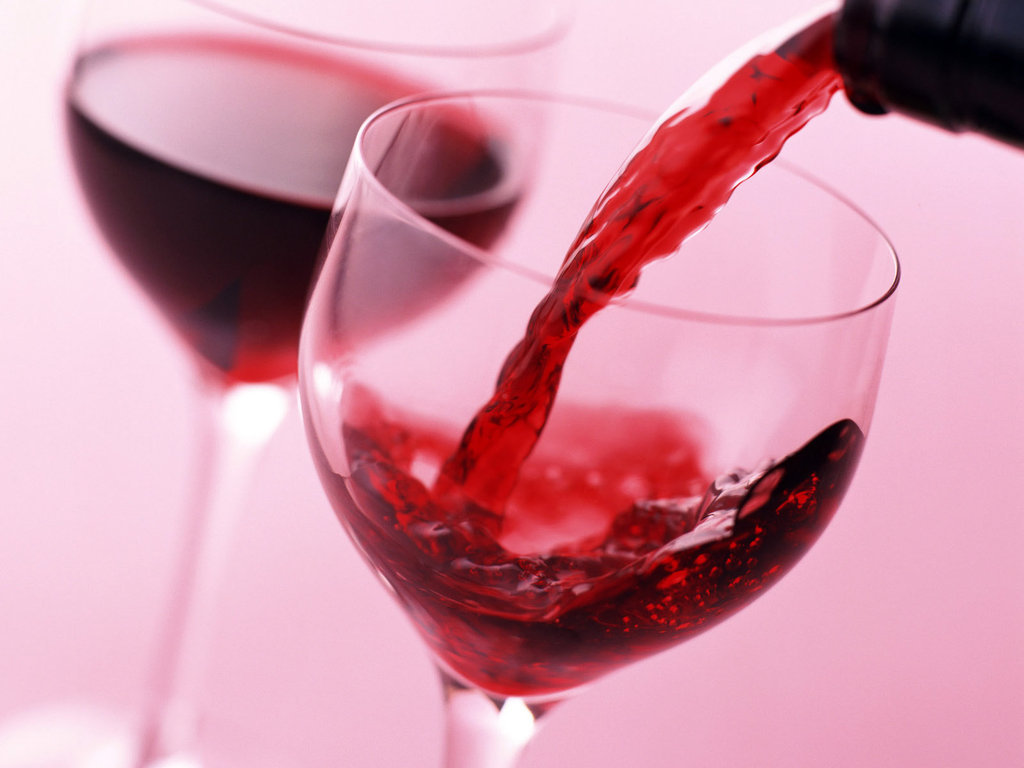

## Análise Exploratória de Dados

In [2]:
!pip install scikit-plot -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scikitplot as skplt
sns.set_style('darkgrid')

In [4]:
df= pd.read_csv('redwine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Dicionário de variáveis

---

**Fixed acidity:** Acidez fixa presente no vinho

**Volatile acidity:** Acidez volátil

**Citric acid:** Ácido cítrico

**Residual sugar:** Açúcar residual

**Chlorides	free:** Clorídricos livres

**Sulfur dioxide:** Dióxido de Enxofre

**Total sulfur dioxide:** Dióxido de enxofre total

**Density:** Densidade do vinho

**pH:** Nível de pH

**Sulphates:** Enxofre

**Alcohol:** Nível de álcool no vinho

**Quality:** Qualidade do vinho

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Verificando dados nulos

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.quality.isnull().sum()
df.quality.dropna(inplace=True)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Renomeando as colunas

In [10]:
df.columns = df.columns.str.replace('.', ' ')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Verificando a distribuição da qualidade

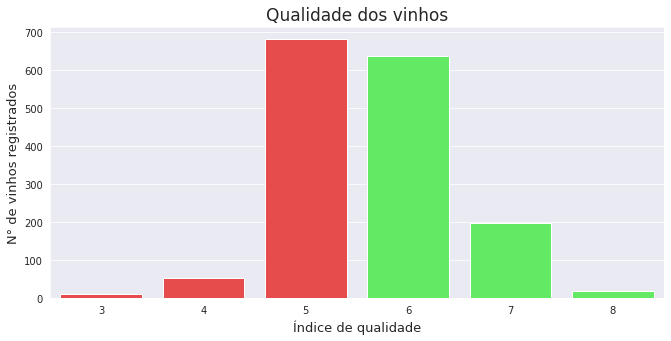

In [11]:
cores = ['#ff3333', '#ff3333', '#ff3333', '#4dff4d', '#4dff4d', '#4dff4d']
paleta = sns.color_palette(cores)
fig = plt.figure(figsize=(11,5))
sns.countplot('quality', data = df, palette = paleta)
plt.title('Qualidade dos vinhos', fontsize=17)
plt.ylabel('N° de vinhos registrados', fontsize=13)
plt.xlabel('Índice de qualidade', fontsize=13);

Analisando componentes químicos

''

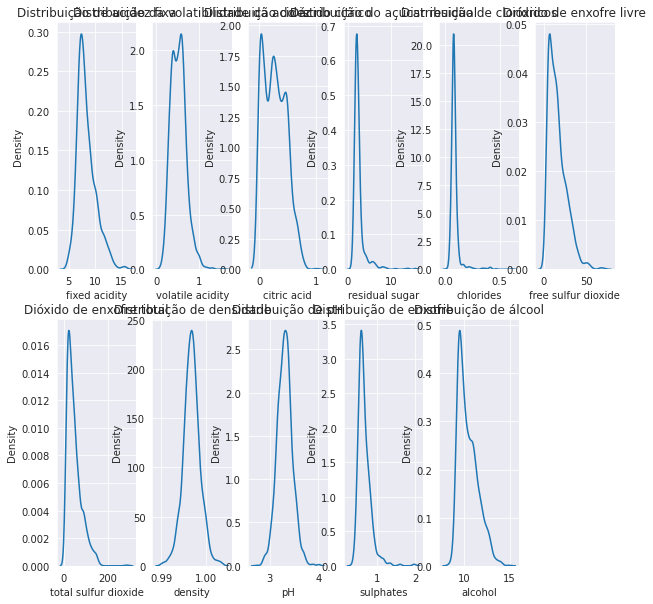

In [12]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,6,1)
sns.kdeplot(df['fixed acidity'])
plt.title('Distribuição de acidez fixa', fontsize=12)

ax2 =  fig.add_subplot(2,6,2)
sns.kdeplot(df['volatile acidity'])
plt.title('Distribuição da volatibilidade da acidez', fontsize=12)

ax3 = fig.add_subplot(2,6,3)
sns.kdeplot(df['citric acid'])
plt.title('Distribuição do ácido cítrico', fontsize=12)

ax4 = fig.add_subplot(2,6,4)
sns.kdeplot(df['residual sugar'])
plt.title('Distribuição do açúcar residual', fontsize=12)

ax5 = fig.add_subplot(2,6,5)
sns.kdeplot(df['chlorides'])
plt.title('Distribuição de clorídricos', fontsize=12)

ax6 = fig. add_subplot(2,6,6)
sns.kdeplot(df['free sulfur dioxide'])
plt.title('Dióxido de enxofre livre', fontsize=12)

ax7 = fig.add_subplot(2,6,7)
sns.kdeplot(df['total sulfur dioxide'])
plt.title('Dióxido de enxofre total', fontsize=12)


ax8 = fig.add_subplot(2,6,8)
sns.kdeplot(df['density'])
plt.title('Distribuição de densidade', fontsize=12)


ax9 = fig.add_subplot(2,6,9)
sns.kdeplot(df['pH'])
plt.title('Distribuição de pH', fontsize=12)


ax10 = fig.add_subplot(2,6,10)
sns.kdeplot(df['sulphates'])
plt.title('Distribuição de enxofre', fontsize=12)


ax11 = fig.add_subplot(2,6,11)
sns.kdeplot(df['alcohol'])
plt.title('Distribuição de álcool', fontsize=12)

;

### **Acidez:**

---

A **acidez** de um vinho é essencial para identificar o aroma e sabor, contribuindo para sua conservação e envelhecimento. Contudo, se concentrada em excesso, a acidez pode estragar o vinho, conferindo ao líquido um paladar muito amargo ou avinagrado. Já se uma bebida é pouco ácida, a prova torna-se pesada e desinteressante.

A acidez de um vinho é não só importantíssima para equi­librar o teor em álcool (e tanino nos tintos) e em particular o teor em açúcar residual existente nos vinhos doces ou nos vinhos generosos, como também é fundamental para a posterior evolução do vinho em garrafa. À partida, um vinho com uma sólida e equilibrada acidez evolui, ou “en­velhece” melhor em garrafa, que um vinho nas condições opostas.

#### **Acidez fixa**

---
A **Acidez Fixa** é a soma dos ácidos fixos. Por princípio, quanto mais elevada for a acidez fixa, mais baixa é a volátil. As bacté­rias acéticas têm dificuldade em desenvolver-se em meios mais ácidos.


''

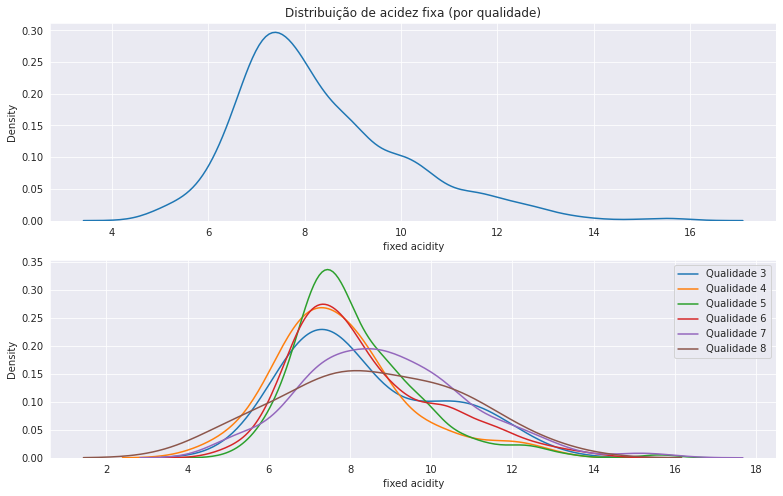

In [13]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['fixed acidity'])
plt.title('Distribuição de acidez fixa (por qualidade)', fontsize=12)

ax2 =  fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['fixed acidity'])
sns.kdeplot(df[df['quality'] == 4] ['fixed acidity'])
sns.kdeplot(df[df['quality'] == 5] ['fixed acidity'])
sns.kdeplot(df[df['quality'] == 6] ['fixed acidity'])
sns.kdeplot(df[df['quality'] == 7] ['fixed acidity'])
sns.kdeplot(df[df['quality'] == 8] ['fixed acidity'])

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### Acidez volátil

---
A **Acidez Volátil** é a soma dos ácidos voláteis, que se liber­tam pode ebulição ou destilação do vinho e traduz o nível de ataque aceto bacteriano ao vinho.


''

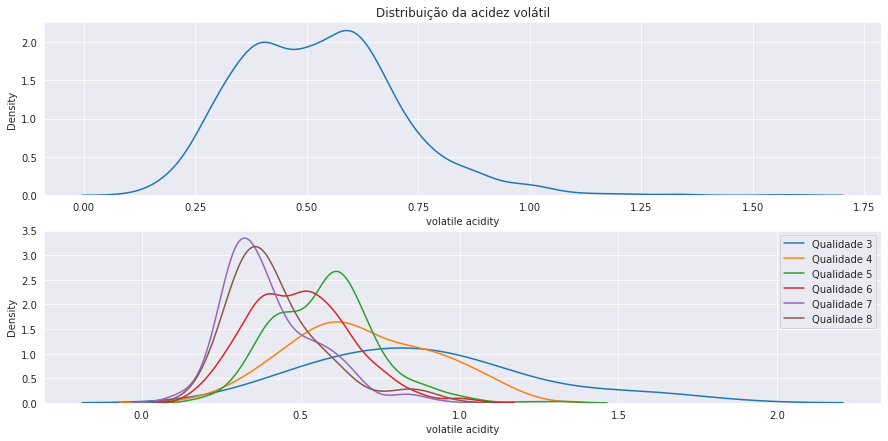

In [14]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['volatile acidity'])
plt.title('Distribuição da acidez volátil', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['volatile acidity'])
sns.kdeplot(df[df['quality'] == 4] ['volatile acidity'])
sns.kdeplot(df[df['quality'] == 5] ['volatile acidity'])
sns.kdeplot(df[df['quality'] == 6] ['volatile acidity'])
sns.kdeplot(df[df['quality'] == 7] ['volatile acidity'])
sns.kdeplot(df[df['quality'] == 8] ['volatile acidity'])

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

;

### Ácido cítrico

''

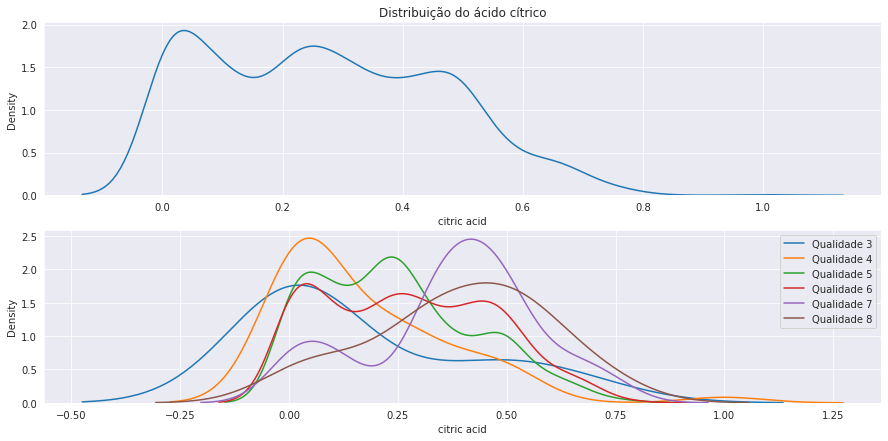

In [15]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['citric acid'])
plt.title('Distribuição do ácido cítrico', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['citric acid'])
sns.kdeplot(df[df['quality'] == 4] ['citric acid'])
sns.kdeplot(df[df['quality'] == 5] ['citric acid'])
sns.kdeplot(df[df['quality'] == 6] ['citric acid'])
sns.kdeplot(df[df['quality'] == 7] ['citric acid'])
sns.kdeplot(df[df['quality'] == 8] ['citric acid'])

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Açucar residual**

''

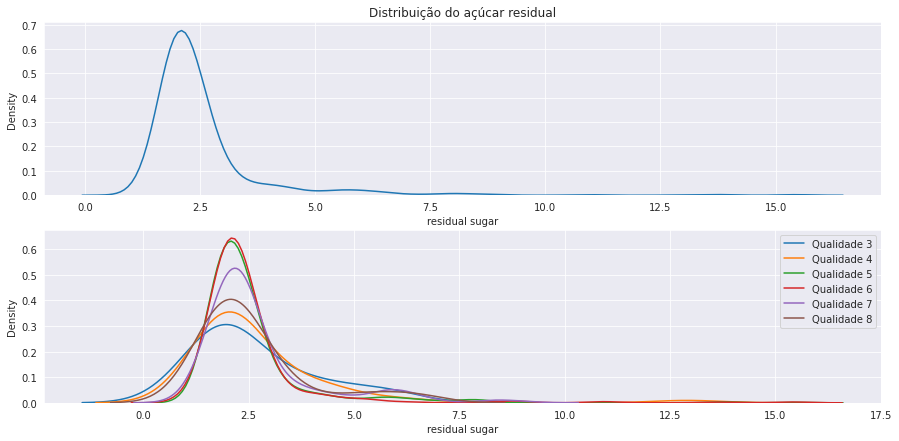

In [16]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['residual sugar'])
plt.title('Distribuição do açúcar residual', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['residual sugar'])
sns.kdeplot(df[df['quality'] == 4] ['residual sugar'])
sns.kdeplot(df[df['quality'] == 5] ['residual sugar'])
sns.kdeplot(df[df['quality'] == 6] ['residual sugar'])
sns.kdeplot(df[df['quality'] == 7] ['residual sugar'])
sns.kdeplot(df[df['quality'] == 8] ['residual sugar'])

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Cloretos**

''

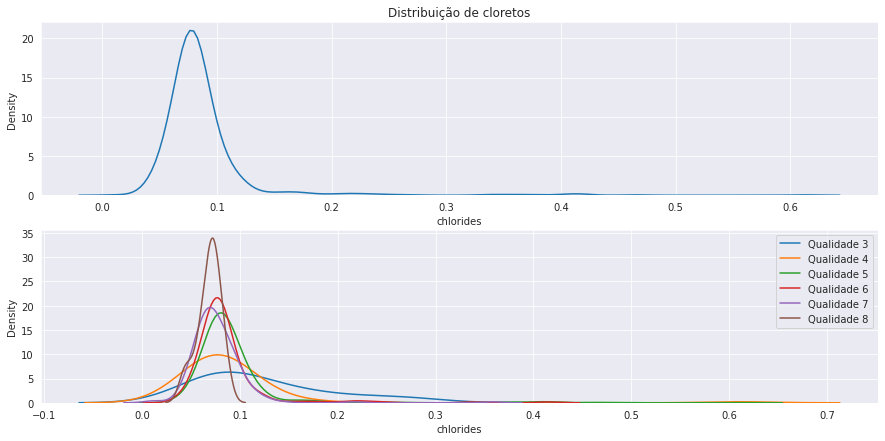

In [17]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['chlorides'])
plt.title('Distribuição de cloretos', fontsize=12)


ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['chlorides'])
sns.kdeplot(df[df['quality'] == 4] ['chlorides'])
sns.kdeplot(df[df['quality'] == 5] ['chlorides'])
sns.kdeplot(df[df['quality'] == 6] ['chlorides'])
sns.kdeplot(df[df['quality'] == 7] ['chlorides'])
sns.kdeplot(df[df['quality'] == 8] ['chlorides'])

plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Enxofre:**

---

O uso do **dióxido de enxofre** (SO2) para a elaboração de vinhos se iniciou ao final do século XVIII. Suas numerosas propriedades, a facilidade de emprego e o baixo custo o colocam como um indispensável auxiliar na produção vinícola. A ação eficaz do SO2 depende do meio e das condições de conservação de cada produto.

Aos sais liberados em solução aquosa (como o vinho) denominamos SO2 Livre, e ao íon bissulfito HSO3 – associado com outras substâncias (aldeídos, dextrinas, pectinas, proteínas, cetonas e certos açúcares) –, SO2 Combinado. A proporção Livre/Combinado forma o chamado SO2 Total, e todo este conjunto depende de diversos fatores, tais como, teor de açúcares, nível de acetaldeído, pH e temperatura.

### **Enxofre livre**

''

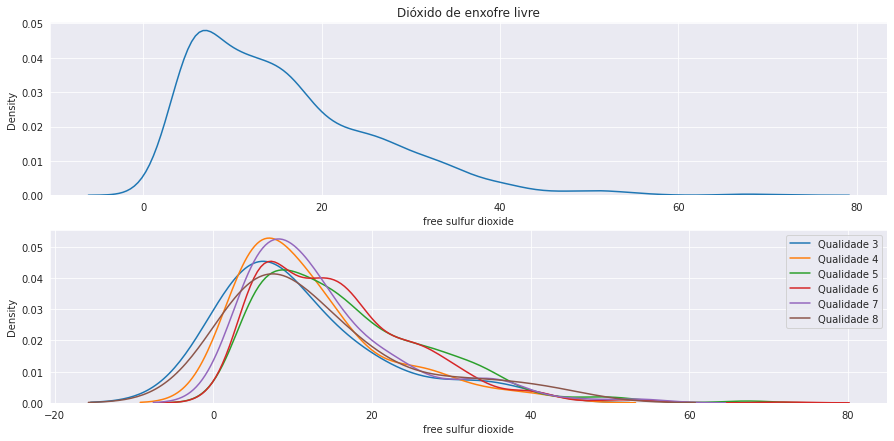

In [18]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['free sulfur dioxide'])
plt.title('Dióxido de enxofre livre', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['free sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 4] ['free sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 5] ['free sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 6] ['free sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 7] ['free sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 8] ['free sulfur dioxide'])
plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Enxofre total**

''

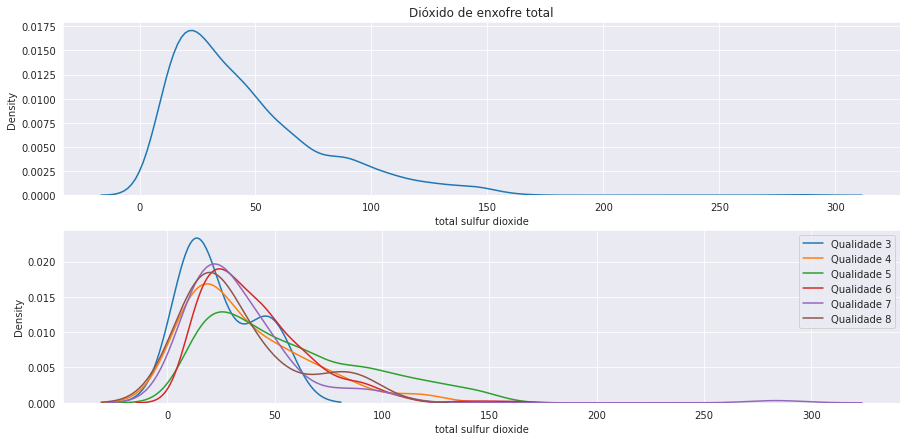

In [19]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['total sulfur dioxide'])
plt.title('Dióxido de enxofre total', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3] ['total sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 4] ['total sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 5] ['total sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 6] ['total sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 7] ['total sulfur dioxide'])
sns.kdeplot(df[df['quality'] == 8] ['total sulfur dioxide'])
plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Densidade**

''

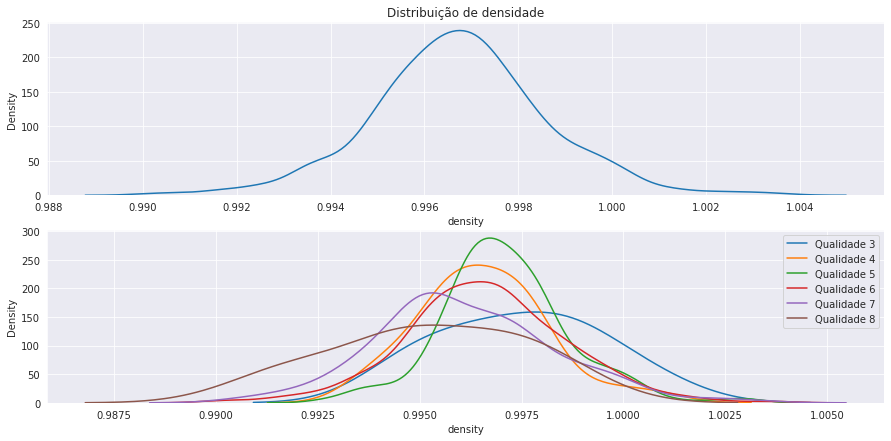

In [20]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['density'])
plt.title('Distribuição de densidade', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3]['density'])
sns.kdeplot(df[df['quality'] == 4]['density'])
sns.kdeplot(df[df['quality'] == 5]['density'])
sns.kdeplot(df[df['quality'] == 6]['density'])
sns.kdeplot(df[df['quality'] == 7]['density'])
sns.kdeplot(df[df['quality'] == 8]['density'])
plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])

;

### **pH**

---
O nível de **pH** tem impacto direto na capacidade de envelhecimento de uma garrafa. Geralmente, um vinho com níveis de pH mais baixos terá maior longevidade. Vinhos de regiões mais frias, onde bate menos sol, tendem a ter maior acidez e pH mais baixo. Estes, por sua vez, tendem a durar mais


''

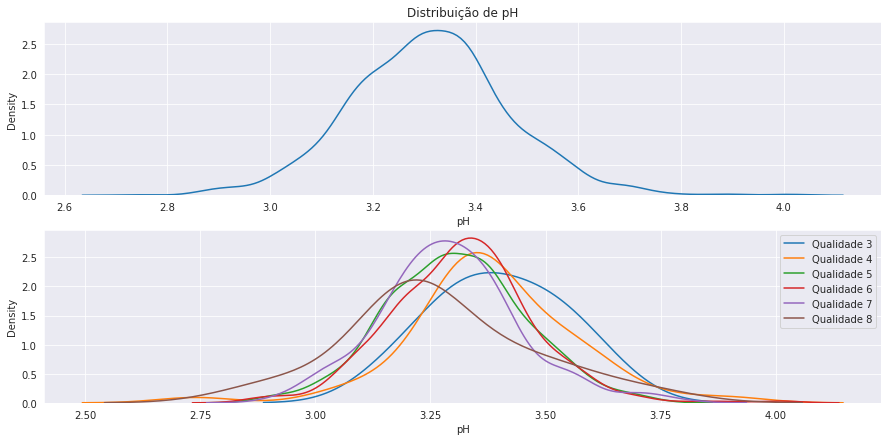

In [21]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['pH'])
plt.title('Distribuição de pH', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3]['pH'])
sns.kdeplot(df[df['quality'] == 4]['pH'])
sns.kdeplot(df[df['quality'] == 5]['pH'])
sns.kdeplot(df[df['quality'] == 6]['pH'])
sns.kdeplot(df[df['quality'] == 7]['pH'])
sns.kdeplot(df[df['quality'] == 8]['pH'])
plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Sulfato:**

''

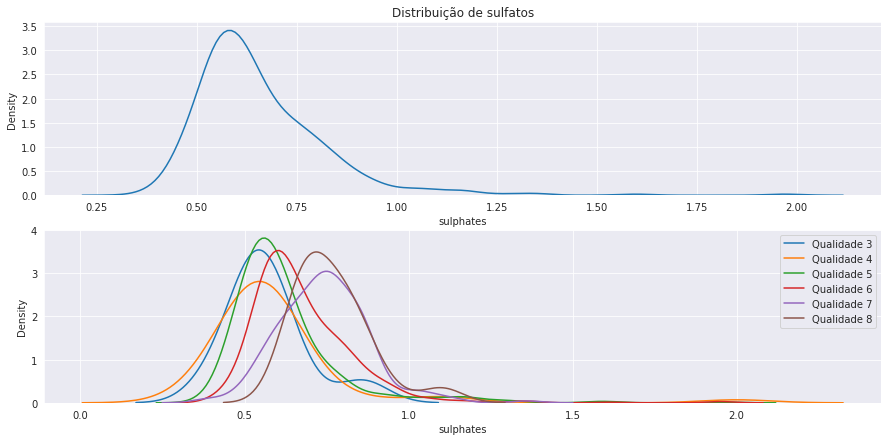

In [22]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['sulphates'])
plt.title('Distribuição de sulfatos', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3]['sulphates'])
sns.kdeplot(df[df['quality'] == 4]['sulphates'])
sns.kdeplot(df[df['quality'] == 5]['sulphates'])
sns.kdeplot(df[df['quality'] == 6]['sulphates'])
sns.kdeplot(df[df['quality'] == 7]['sulphates'])
sns.kdeplot(df[df['quality'] == 8]['sulphates'])
plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

### **Álcool:**

---

O **teor alcoólico** do vinho é o que permite o desenvolvimento de sua complexidade e do seu equilíbrio. Enquanto bebidas com grandes níveis de álcool suportam maior acidez e trazem suavidade ao paladar, os com menos acidez são percebidos como ásperos. Falta justamente o álcool para dar suporte para essas características.

''

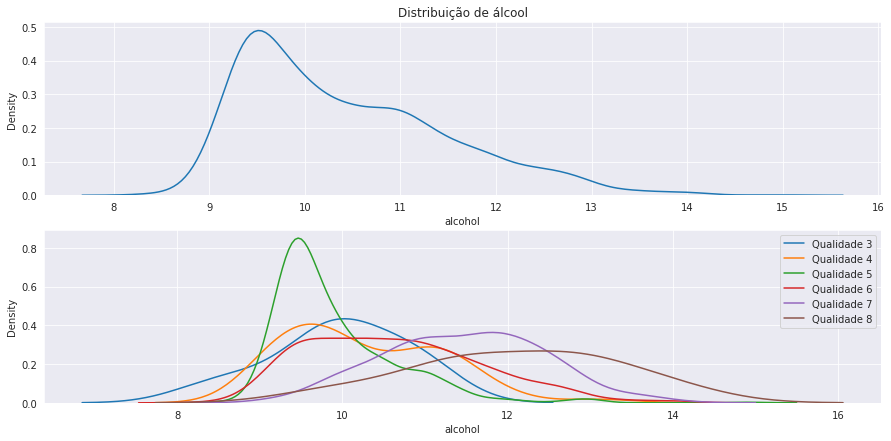

In [23]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(df['alcohol'])
plt.title('Distribuição de álcool', fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.kdeplot(df[df['quality'] == 3]['alcohol'])
sns.kdeplot(df[df['quality'] == 4]['alcohol'])
sns.kdeplot(df[df['quality'] == 5]['alcohol'])
sns.kdeplot(df[df['quality'] == 6]['alcohol'])
sns.kdeplot(df[df['quality'] == 7]['alcohol'])
sns.kdeplot(df[df['quality'] == 8]['alcohol'])
plt.legend(['Qualidade 3', 'Qualidade 4', 'Qualidade 5','Qualidade 6', 'Qualidade 7', 'Qualidade 8'])
;

## **Correlacionando os atributos com a qualidade do vinho**

In [24]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Como podemos observar, a maior correlação positiva para a qualidade é o álcool, com **0.47** e a maior correlação negativa é a acidez volátil, com **-0.39**.

# **Modelagem**


---
O que é?

Por que usar?

Como usar?

## **Pré-processamento dos dados**

---

O pré-processamento dos dados é uma parte da análise que merece muito cuidado e atenção, porque é a parte onde tratamos os dados e as variáveis que iremos utilizar na aplicação dos modelos.

Primeiro transformaremos a qualidade em uma variáveis com 2 elementos, os vinhos bons e os vinhos ruins

In [25]:
bins = (2, 5, 8)
df['quality'] = pd.cut(df['quality'], bins = bins, labels = ['bad', 'good'])

In [26]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

''

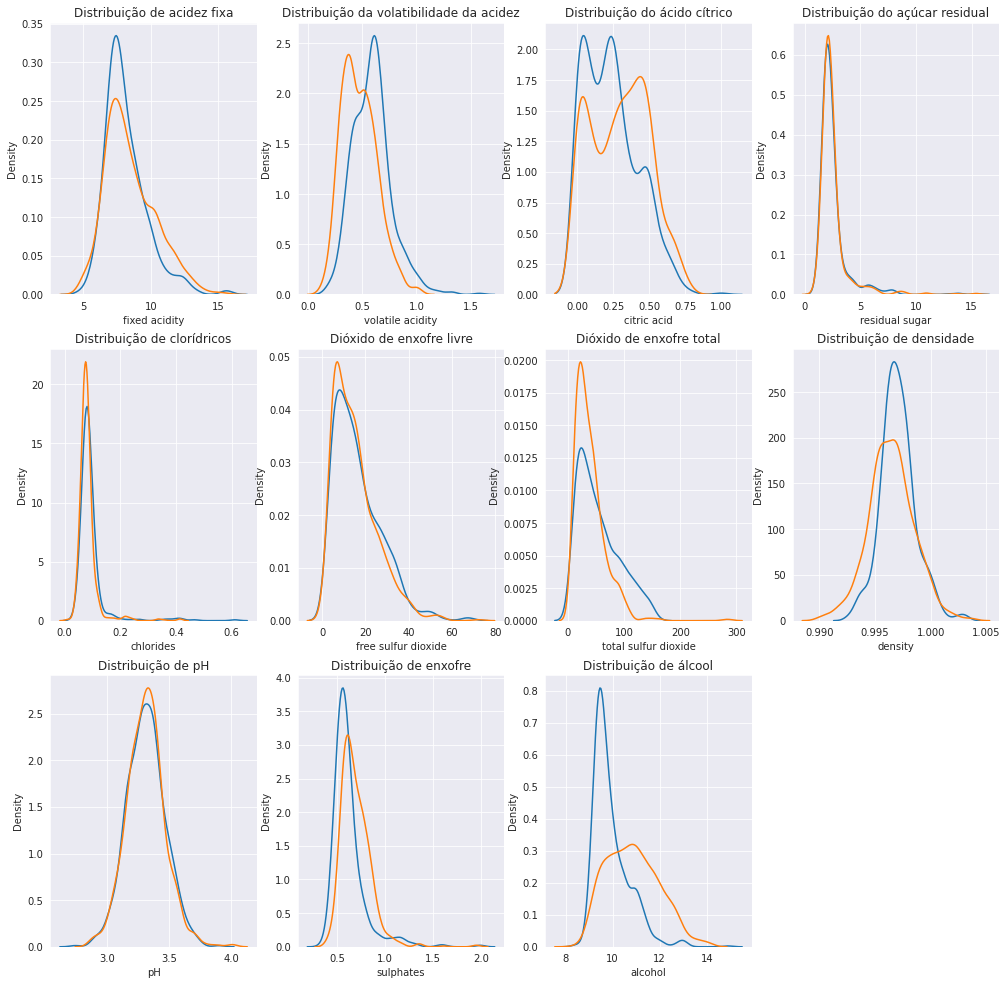

In [27]:
fig = plt.figure(figsize=(17,17))
ax1 = fig.add_subplot(3,4,1)
sns.kdeplot(df[df['quality'] == 'bad'] ['fixed acidity'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['fixed acidity'], label = 'Superior')
plt.title('Distribuição de acidez fixa', fontsize=12)

ax2 =  fig.add_subplot(3,4,2)
sns.kdeplot(df[df['quality'] == 'bad'] ['volatile acidity'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['volatile acidity'], label = 'Superior');
plt.title('Distribuição da volatibilidade da acidez', fontsize=12)

ax3 = fig.add_subplot(3,4,3)
sns.kdeplot(df[df['quality'] == 'bad'] ['citric acid'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['citric acid'], label = 'Superior');
plt.title('Distribuição do ácido cítrico', fontsize=12)

ax4 = fig.add_subplot(3,4,4)
sns.kdeplot(df[df['quality'] == 'bad'] ['residual sugar'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['residual sugar'], label = 'Superior');
plt.title('Distribuição do açúcar residual', fontsize=12)

ax5 = fig.add_subplot(3,4,5)
sns.kdeplot(df[df['quality'] == 'bad'] ['chlorides'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['chlorides'], label = 'Superior');
plt.title('Distribuição de clorídricos', fontsize=12)

ax6 = fig. add_subplot(3,4,6)
sns.kdeplot(df[df['quality'] == 'bad'] ['free sulfur dioxide'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['free sulfur dioxide'], label = 'Superior');
plt.title('Dióxido de enxofre livre', fontsize=12)

ax7 = fig.add_subplot(3,4,7)
sns.kdeplot(df[df['quality'] == 'bad'] ['total sulfur dioxide'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['total sulfur dioxide'], label = 'Superior');
plt.title('Dióxido de enxofre total', fontsize=12)


ax8 = fig.add_subplot(3,4,8)
sns.kdeplot(df[df['quality'] == 'bad'] ['density'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['density'], label = 'Superior');
plt.title('Distribuição de densidade', fontsize=12)


ax9 = fig.add_subplot(3,4,9)
sns.kdeplot(df[df['quality'] == 'bad'] ['pH'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['pH'], label = 'Superior');
plt.title('Distribuição de pH', fontsize=12)


ax10 = fig.add_subplot(3,4,10)
sns.kdeplot(df[df['quality'] == 'bad'] ['sulphates'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['sulphates'], label = 'Superior');
plt.title('Distribuição de enxofre', fontsize=12)


ax11 = fig.add_subplot(3,4,11)
sns.kdeplot(df[df['quality'] == 'bad'] ['alcohol'], label = 'Inferior')
sns.kdeplot(df[df['quality'] == 'good'] ['alcohol'], label = 'Superior');
plt.title('Distribuição de álcool', fontsize=12)

;

Definindo X e Y:

In [28]:
X = df.drop('quality', axis=1) #Todas as variáveis, exceto a Qualidade
Y = df['quality'] #Apenas a variável Qualidade

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[:1599], Y, test_size = 0.2, random_state = 42)

## **Aplicação dos modelos**

---

Agora que nossos dados já estão organizados, podemos aplicar os modelos. Aqui utilizaremos os principais modelos de classificação, são eles:

* **Regressão logística**

* **K-Vizinhos**

* **Árvore de decisão**

* **Floresta aleatória**

* **Árvore de decisão**

### Regressão Logística

---
A **regressão logística** é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias **REFERÊNCIA**


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred_proba_lr = lr.predict_proba(X_test)
pred_lr = lr.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### K-vizinhos

---
No reconhecimento de padrões, o algoritmo k-vizinhos mais próximos é um método não paramétrico proposto por Thomas Cover usado para classificação e regressão. Nos dois casos, a entrada consiste nos k exemplos de treinamento mais próximos no espaço de recursos **REFERÊNCIA**


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_proba = knn.predict_proba(X_test)
pred_knn = knn.predict(X_test)


### Árvore de decisão

---
O aprendizado da **árvore de decisão** é uma das abordagens de modelagem preditiva usadas em estatística, mineração de dados e aprendizado de máquina. Ele usa uma árvore de decisão (como um modelo preditivo) para ir de observações sobre um item (representado nos ramos) para conclusões sobre o valor alvo do item (representado nas folhas). Modelos de árvore em que a variável de destino pode assumir um conjunto discreto de valores são chamados de árvores de classificação; nessas estruturas de árvore, as folhas representam rótulos de classe e os ramos representam conjunções de recursos que levam a esses rótulos de classe. As árvores de decisão nas quais a variável de destino pode assumir valores contínuos (normalmente números reais) são chamadas de árvores de regressão. As árvores de decisão estão entre os algoritmos de aprendizado de máquina mais populares devido à sua inteligibilidade e simplicidade.



In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_proba = dt.predict_proba(X_test)
pred_dt = dt.predict(X_test)

### Random Forest

---
**Florestas aleatórias** ou florestas de decisão aleatória são um método de aprendizagem de conjunto para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes (classificação) ou predição média (regressão) das árvores individuais


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)
rf.score(X_test, Y_test)

0.8

### Support Vector machine

---

No aprendizado de máquina, as máquinas de vetores de suporte são modelos de aprendizado supervisionado com algoritmos de aprendizado associados que analisam os dados usados ​​para classificação e análise de regressão. Apresenta um dos métodos de previsão mais robustos, com base na estrutura de aprendizagem estatística


In [34]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, Y_train)
pred_sv = sv.predict(X_test)


### XGBOOST

In [35]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, Y_train)
pred_xg = xg.predict(X_test)
print(classification_report(Y_test, pred_xg))

              precision    recall  f1-score   support

         bad       0.72      0.75      0.74       141
        good       0.80      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



### Métricas de avaliação

---
Durante o processo de criação de um modelo de machine learning nós precisamos medir a qualidade dele de acordo com o objetivo da tarefa. Existem funções matemáticas que nos ajudam a avaliar a capacidade de erro e acerto dos nossos modelos, e agora você conhecerá algumas das mais utilizadas. No artigo, usarei a palavra métrica para me referir a essas funções.

Tão importante quanto saber escolher um bom modelo, é saber escolher a métrica correta para decidir qual é o melhor entre eles.

Existem métricas mais simples, outras mais complexas, algumas que funcionam melhor para datasets com determinadas características, ou outras personalizadas de acordo com o objetivo final do modelo.

Ao escolher uma métrica deve-se levar em consideração fatores como a proporção de dados de cada classe no dataset e o objetivo da previsão (probabilidade, binário, ranking, etc). Por isso é importante conhecer bem a métrica que será utilizada, já que isso pode fazer a diferença na prática.

Nenhuma destas funções é melhor do que as outras em todos os casos. É sempre importante levar em consideração a aplicação prática do modelo. O objetivo deste artigo não é ir a fundo em cada uma delas, mas apresentá-las para que você possa pesquisar mais sobre as que achar interessante.


Regressão logística

In [36]:
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

         bad       0.70      0.74      0.72       141
        good       0.78      0.75      0.77       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



K-Vizinhos

In [37]:
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

         bad       0.56      0.57      0.57       141
        good       0.66      0.64      0.65       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



Árvore de decisão

In [38]:
print(classification_report(Y_test, pred_dt))

              precision    recall  f1-score   support

         bad       0.67      0.68      0.67       141
        good       0.74      0.73      0.74       179

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



Random Forest

In [39]:
print(classification_report(Y_test, pred_rf))

              precision    recall  f1-score   support

         bad       0.77      0.78      0.77       141
        good       0.82      0.82      0.82       179

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



Support Vector Machine

In [40]:
print(classification_report(Y_test, pred_sv))

              precision    recall  f1-score   support

         bad       0.68      0.34      0.45       141
        good       0.63      0.87      0.73       179

    accuracy                           0.64       320
   macro avg       0.65      0.61      0.59       320
weighted avg       0.65      0.64      0.61       320



XGboost

In [41]:
print(classification_report(Y_test, pred_xg))

              precision    recall  f1-score   support

         bad       0.72      0.75      0.74       141
        good       0.80      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



Analisando a **Acurácia**, podemos notar que o modelo de **Floresta Aleatória** obteve um desempenho superior aos demais, classificando de maneira mais eficiente os vinhos de qualidade inferior x superior. Então agora exploraremos suas outras métricas de avaliação.

#### **ROC e AUC**

A curva **ROC** mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O valor do **AUC** varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.

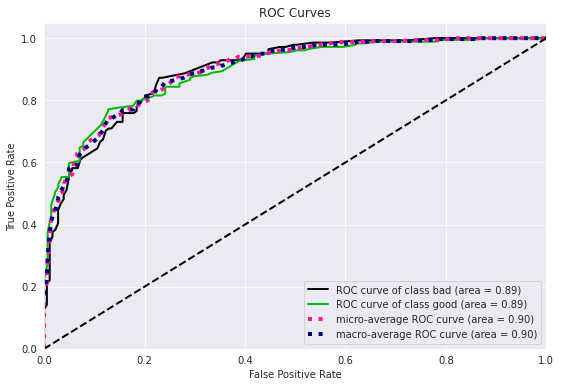

In [42]:
skplt.metrics.plot_roc(Y_test, rf_proba, figsize=(9,6));

#### Ganho cumulativo

Um gráfico de **ganhos cumulativos** avalia o desempenho de um modelo de classificação por cada parte dos dados. Para cada percentil do conjunto de dados, o gráfico mostra quantas mais amostras foram classificadas com precisão.

O gráfico de **crescimento** mostra a probabilidade de recebermos respostas positivas ao entrarmos em contato com uma amostra aleatória da população.

Ganho ou crescimento é uma medida da eficácia de um modelo de classificação calculado como a razão entre os resultados obtidos com e sem o modelo. Gráficos de ganho e crescimento são auxílios visuais para avaliar o desempenho dos modelos de classificação. No entanto, em contraste com a matriz de confusão que avalia os modelos em toda a população, o gráfico de ganho ou crescimento avalia o desempenho do modelo em uma parte da população. 

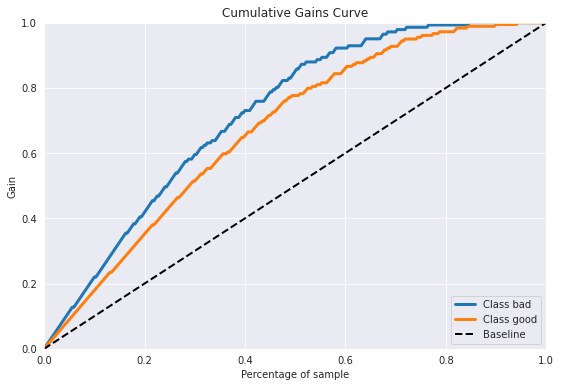

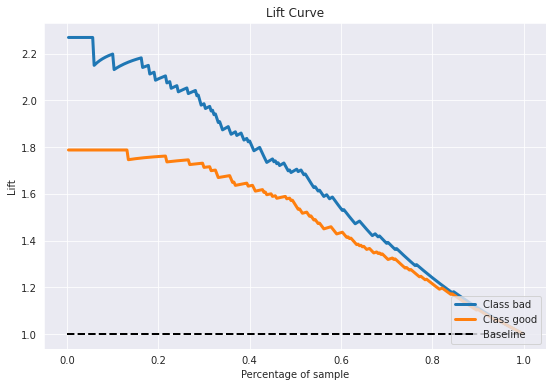

In [43]:
skplt.metrics.plot_cumulative_gain(Y_test, rf_proba, figsize=(9,6))
skplt.metrics.plot_lift_curve(Y_test,rf_proba, figsize=(9,6));

#### Importância de cada *feature*

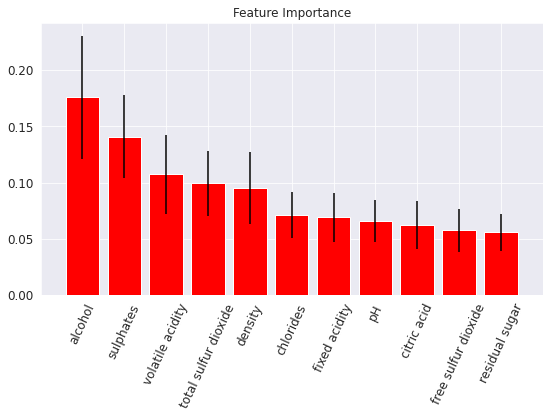

In [44]:
skplt.estimators.plot_feature_importances(rf, feature_names=df.columns, x_tick_rotation=65, figsize=(9,5), text_fontsize='large');

Podemos ver que o álcool é o mais relevante para a qualidade do vinho

In [45]:
importance = rf.feature_importances_
colunas = df.columns.drop('quality')
df_feat = pd.DataFrame(importance, index=colunas)
df_feat2 = df_feat.T
df_feat2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.068981,0.107286,0.062195,0.055762,0.070959,0.057558,0.099566,0.095033,0.066006,0.140834,0.175821


In [46]:
xx = df_feat2.columns.tolist()
yy = df_feat2.values.tolist()
yy = yy[0]
dici = dict(zip(xx,yy))
dici = sorted(dici.items(), key= lambda x: x[1], reverse=True)
dici
len(dici)

11

In [47]:
lista_x = []
lista_y = []
for i in range(0,11):
  lista_x.append(dici[i][1])
  lista_y.append(dici[i][0])


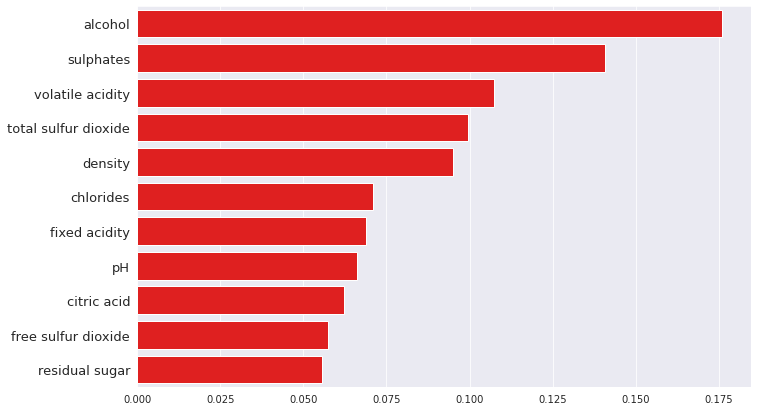

In [48]:
import seaborn as sns
fig = plt.figure(figsize=(11,7))
sns.barplot(lista_x, lista_y, color='red')
plt.yticks(fontsize=13);

In [49]:
importance_lista = importance.tolist()

In [50]:
colunas_lista = []
for i in colunas:
  colunas_lista.append(i)
colunas_lista

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [51]:
dicionario = dict(zip(colunas_lista,importance_lista))
dicionario = sorted(dicionario.items(), key=lambda x:x[1], reverse=True)

In [52]:
for k in range(len(colunas)):
    print(f'{dicionario[k][1]:.4f}{dicionario[k][0]}', end=' + ') 

0.1758alcohol + 0.1408sulphates + 0.1073volatile acidity + 0.0996total sulfur dioxide + 0.0950density + 0.0710chlorides + 0.0690fixed acidity + 0.0660pH + 0.0622citric acid + 0.0576free sulfur dioxide + 0.0558residual sugar + 

# Referências

«Logistic Regression». Consultado em 12 de dezembro de 2008

Altman, Naomi S. (1992). "An introduction to kernel and nearest-neighbor nonparametric regression" (PDF). The American Statistician. 46 (3): 175–185. doi:10.1080/00031305.1992.10475879. hdl:1813/31637.

Wu, Xindong; Kumar, Vipin; Ross Quinlan, J.; Ghosh, Joydeep; Yang, Qiang; Motoda, Hiroshi; McLachlan, Geoffrey J.; Ng, Angus; Liu, Bing; Yu, Philip S.; Zhou, Zhi-Hua (2008-01-01). "Top 10 algorithms in data mining". Knowledge and Information Systems. 14 (1): 1–37. doi:10.1007/s10115-007-0114-2. ISSN 0219-3116. S2CID 2367747.